In [226]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
import pickle

In [227]:
maints = pd.read_csv("maints.csv")
nMaints = pd.read_csv("notMaints.csv")
maints = maints.drop(columns=["machineID","Unnamed: 0","maint_comp"])
maints['maint'] = 1
nMaints = nMaints.drop(columns=[ "Unnamed: 0" ] )
nMaints['maint'] = 0

In [229]:
oversampleMaints = maints.sample(frac=0.2, replace=True)
undersampleNMaints = nMaints.sample(frac=0.5)
allsamples = pd.concat([oversampleMaints,undersampleNMaints],axis=0)
allsamples.to_csv("simulation2.csv")

In [108]:
oversampleMaints = maints.sample(frac=2.0, replace=True)
undersampleNMaints = nMaints.sample(frac=0.2)
allsamples = pd.concat([oversampleMaints,undersampleNMaints],axis=0)
x = allsamples.drop(columns=['maint'])
y = allsamples['maint']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [204]:
# want to minimize False Negative
def get_acc_fn(w):
    model = LogisticRegression(penalty='l2',class_weight={0:1-w,1:w},max_iter=4000)
    model.fit(x_train,y_train)
    acc = accuracy_score( y,model.predict(x))
    cm = confusion_matrix(y, model.predict(x))
    FN = cm[1][0] / y.shape[0]
    return acc, FN

def tune_acc_fn():
    args_list = []
    for w in np.arange(0.01,1,0.01):
        args_list.append(get_acc_fn(w))
    return np.array(args_list)

In [205]:
allargs = tune_acc_fn()

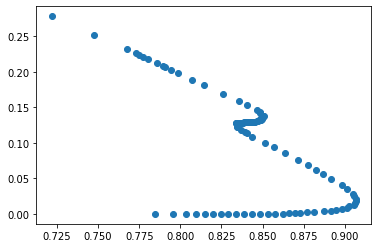

In [206]:
plt.scatter(allargs[:,0],allargs[:,1])

In [210]:
print(np.argmin(allargs[:,1]),np.argmax(allargs[:,0]))

85 69


In [212]:
allargs[69:86]

array([[9.06811311e-01, 2.13409212e-02],
       [9.06811311e-01, 1.77841010e-02],
       [9.06188867e-01, 1.49386449e-02],
       [9.05299662e-01, 1.24488707e-02],
       [9.02720967e-01, 1.08483016e-02],
       [9.01565001e-01, 8.09176596e-03],
       [8.98363863e-01, 6.75795839e-03],
       [8.94629201e-01, 5.24630980e-03],
       [8.91694825e-01, 3.82358172e-03],
       [8.87337720e-01, 3.82358172e-03],
       [8.81024364e-01, 3.20113818e-03],
       [8.77111862e-01, 2.66761515e-03],
       [8.72932598e-01, 1.68948960e-03],
       [8.69464699e-01, 1.24488707e-03],
       [8.66174640e-01, 7.11364041e-04],
       [8.62351058e-01, 8.89205051e-05],
       [8.57549351e-01, 0.00000000e+00]])

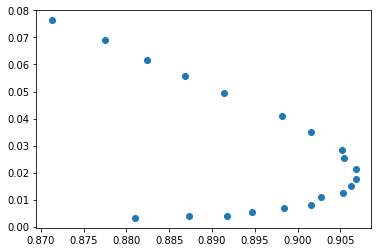

In [211]:
plt.scatter(allargs[60:80,0],allargs[60:80,1])

In [213]:
OPT_ARG = 0.74
OPT_model = LogisticRegression(penalty='l2',class_weight={0:OPT_ARG,1:OPT_ARG}, max_iter=4000)
OPT_model.fit(x,y)

LogisticRegression(class_weight={0: 0.74, 1: 0.74}, max_iter=4000)

In [225]:
model_file = open("PredictiveMigration.pkl","wb")
model_file.write(pickle.dumps(OPT_model))
model_file.close()